In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # visualization libaray
import seaborn as sns       # visualization libaray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


- Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales. Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.  
<br>
- Attribute Description
  - Item_Identifier ---- Unique product ID 
  - Item_Weight ---- Weight of product 
  - Item_Fat_Content ---- Whether the product is low fat or not 
  - Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product 
  - Item_Type ---- The category to which the product belongs 
  - Item_MRP ---- Maximum Retail Price (list price) of the product 
  - Outlet_Identifier ---- Unique store ID  
  - Outlet_Establishment_Year ---- The year in which the store was established 
  - Outlet_Size ---- The size of the store in --    termsof ground area covered 
  - Outlet_Location_Type ---- The type of city in which the store is located
  - *Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket 
  - Item_Outlet_Sales ---- Sales of the product in the particular store. This is the outcome variable to be predicted.
  
  
- Objectives
- Build a predictive model and find out the sales of each product at a particular store. Use the Ridge,Lasso & ElasticNet regression techniques. 
- Evaluate model efficiency using RMSE and R-Square values  .

In [2]:
df = pd.read_csv(r"Data Sets\bigmart.csv")

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.Item_Fat_Content.dtype

dtype('O')

### Let us check the unique value of each categorical columns

In [7]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"The unique value for the columns {col} are: \n\t\t{df[col].unique()} and the no of unique values are :- {df[col].nunique()}")

The unique value for the columns Item_Identifier are: 
		['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] and the no of unique values are :- 1559
The unique value for the columns Item_Fat_Content are: 
		['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] and the no of unique values are :- 5
The unique value for the columns Item_Type are: 
		['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] and the no of unique values are :- 16
The unique value for the columns Outlet_Identifier are: 
		['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] and the no of unique values are :- 10
The unique value for the columns Outlet_Size are: 
		['Medium' nan 'High' 'Small'] and the no of unique values are :- 3
The unique value for the columns Outlet_Location_Type are: 
		['Tier 1' 'Tier 3' 'Tier 2'] and the

# Observations :
- It can seen the column Item_Fat_Content is having 3 different names for the category Low Fat ("Low Fat","low fat","LF") and two different names for the category Regular ("Regular","reg")

In [8]:
# Let us correct the categories in the column Item_Fat_Content
category_mapping = {"Low Fat" : "Low Fat" ,
                   "low fat": "Low Fat",
                   "LF": "Low Fat",
                   "Regular":"Regular",
                   "reg": "Regular"}
df["Item_Fat_Content"] = df ["Item_Fat_Content"].map (category_mapping)   # using map method

df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [9]:
df["Outlet_Age"] = 2024 - df["Outlet_Establishment_Year"]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [10]:
# Dropping the Outlet_EStablishment_Year column as we have create the Outlet_Age column
df.drop(columns =["Outlet_Establishment_Year"],inplace = True)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [11]:
df.isnull().sum() # Item_weight :- 1463, Outlet_Size :- 2410..

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

In [12]:
df.describe() # check the (Count,central_tendancy, std,IQR, min,max values )

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,26.168133
std,4.643456,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,15.000000
25%,8.773750,0.026989,93.826500,834.247400,20.000000
50%,12.600000,0.053931,143.012800,1794.331000,25.000000
75%,16.850000,0.094585,185.643700,3101.296400,37.000000
max,21.350000,0.328391,266.888400,13086.964800,39.000000


##### Let us check the values of each category  in each of the categorical columns

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"Value counts for the columns{col} are : \n\n {df[col].value_counts()}\n")

Value counts for the columnsItem_Identifier are : 

 Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Value counts for the columnsItem_Fat_Content are : 

 Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Value counts for the columnsItem_Type are : 

 Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Value counts for the columnsOutlet_Identifier are : 

 Outlet_Id

##### Hadling Missing Values

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Weight', ylabel='Density'>

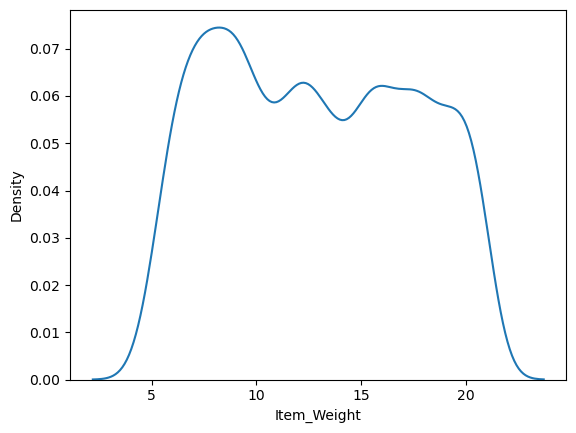

In [14]:
# Let us the check KDE of Item_weight
sns.kdeplot(x=df.Item_Weight)

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outlet_Size', ylabel='Count'>

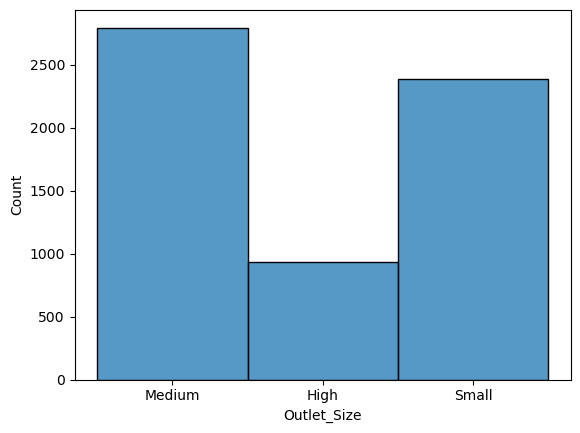

In [15]:
sns.histplot(x=df.Outlet_Size)

In [16]:
{"Mean of the Item weight":df.Item_Weight.mean(), "Mode of Item Weight":df.Item_Weight.mode()[0],"Median of the weight": df.Item_Weight.median()}

{'Mean of the Item weight': 12.857645184135976,
 'Mode of Item Weight': 12.15,
 'Median of the weight': 12.6}

# Observations:
- The mean,median and mode are approximately equal and give a true representaion of the central tendency of the column Item_Weight.

# Conclusion:
- Therefore, we fill the missing values of the Item_Weight column with us mean

In [17]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [18]:
# for the Outlet_Size column we are choosing the repalce the missing values with the mode of the column that is "Medium"

In [19]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [20]:
df.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

# Univariate Analysis

Text(0.5, 1.0, 'Item Visibility')

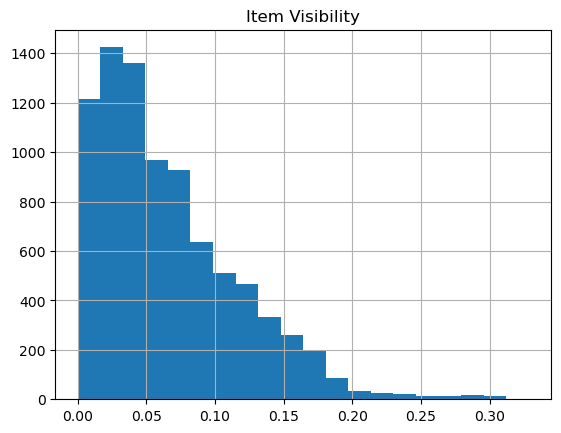

In [21]:
df["Item_Visibility"].hist(bins=20)
plt.title("Item Visibility")

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7d6536fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7d65374f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7d6536d10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7d6537a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7d6537cd0>],
 'means': []}

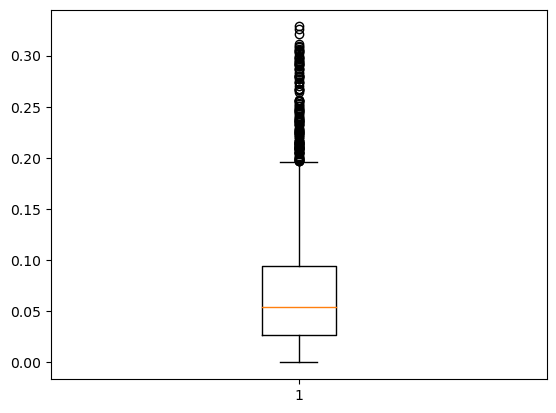

In [22]:
plt.boxplot(df["Item_Visibility"])

In [23]:
# Filtering the data set with no outliers with repect to the item_Visibility Colum
Q1 = df["Item_Visibility"].quantile(0.25)
Q3 = df["Item_Visibility"].quantile(0.75)
IQR = (Q3-Q1)
filt_df = df.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5 *@IQR)')  ##Formula for outliers

In [24]:
filt_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [25]:
filt_df.shape, df.shape   # Check to shape of both Orignal Data And Clean the outliers data..

((8379, 12), (8523, 12))

In [26]:
df.shape[0] - filt_df.shape[0]  # This gives the no of rows that will be removed on filtering

144

In [27]:
# we will continue with the filtered data
df = filt_df

In [28]:
df.loc[:,"Item_Visibility_bins"] = pd.cut(df["Item_Visibility"],[0.000,0.065,0.13,0.2],labels=["Low Viz","Viz","High Viz"])

In [29]:
df.groupby(["Item_Visibility"]).max()["Item_Visibility_bins"]

Item_Visibility
0.000000         NaN
0.003575     Low Viz
0.003589     Low Viz
0.003598     Low Viz
0.003599     Low Viz
              ...   
0.193773    High Viz
0.194875    High Viz
0.195068    High Viz
0.195689    High Viz
0.195721    High Viz
Name: Item_Visibility_bins, Length: 7736, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [30]:
# Checking the missing values in the Item_Visibility_bins column
df["Item_Visibility_bins"].isna().sum()

526

**Observations** - The Item_Visibility_bins column in having missing values for the items which have a zero visibility.

In [31]:
# Filling the missing values with Low_Viz
df.loc[:,"Item_Visibility_bins"] = df["Item_Visibility_bins"].fillna("Low Viz")

In [32]:
df["Item_Visibility_bins"].isnull().sum()

0

# Lable Encoding
- Now we perfrom Label Encoding for the categorical columns with ordinal categories.

In [33]:
le = LabelEncoder()

In [34]:
df.loc[:,"Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])

In [35]:
df.loc[:,"Item_Visibility_bins"] = le.fit_transform(df["Item_Visibility_bins"].astype(str))

C:\Users\gaura\AppData\Local\Temp\ipykernel_34592\4200820979.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:,"Item_Visibility_bins"] = le.fit_transform(df["Item_Visibility_bins"].astype(str))


In [36]:
df.loc[:,"Outlet_Size"] = le.fit_transform(df["Outlet_Size"])

In [37]:
df.loc[:,"Outlet_Location_Type"] = le.fit_transform(df["Outlet_Location_Type"])

# One-hot Encoding
- Let's create dummy variables for categorical columns with nominal categories

In [38]:
## Create dummy variable for Outlet Type
dummy = pd.get_dummies(df["Outlet_Type"], drop_first = True)
dummy.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,False
4,True,False,False


In [39]:
df = pd.concat([df,dummy],axis = 1)

In [40]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,25,1,True,False,False
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,15,1,False,True,False
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,25,1,True,False,False
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1,2,Grocery Store,732.3800,26,1,False,False,False
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,37,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,0,2,Supermarket Type1,2778.3834,37,1,True,False,False
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,1,1,Supermarket Type1,549.2850,22,1,True,False,False
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2,1,Supermarket Type1,1193.1136,20,1,True,False,False
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,1,2,Supermarket Type2,1845.5976,15,0,False,True,False


In [41]:
df.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Visibility_bins      int32
Supermarket Type1          bool
Supermarket Type2          bool
Supermarket Type3          bool
dtype: object

# Dropping unnecessary columns

In [42]:
# Removing unnecessary column
df = df.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Type"],axis = 1)


In [43]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [44]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,25,1,True,False,False
1,5.92,1,0.019278,48.2692,1,2,443.4228,15,1,False,True,False
2,17.50,0,0.016760,141.6180,1,0,2097.2700,25,1,True,False,False
3,19.20,1,0.000000,182.0950,1,2,732.3800,26,1,False,False,False
4,8.93,0,0.000000,53.8614,0,2,994.7052,37,1,True,False,False


In [45]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Item_Outlet_Sales       0
Outlet_Age              0
Item_Visibility_bins    0
Supermarket Type1       0
Supermarket Type2       0
Supermarket Type3       0
dtype: int64

# Model Training

In [46]:
x = df.drop(columns=["Item_Outlet_Sales"])
y = df.Item_Outlet_Sales

### Train test split

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5865, 11)
(2514, 11)
(5865,)
(2514,)


### Standardization

In [51]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Linear Regression Model

In [53]:
linear = LinearRegression()
linear.fit(xtrain,ytrain)

LinearRegression()

In [54]:
print(f"The intercept is {linear.intercept_}")  # Give the intercept
print(f"The coefficients is {linear.coef_}")  # Give the coefficients

The intercept is 2247.1469722421143
The coefficients is [  14.14280431   13.16018292   -9.0277478   996.92970748   10.10820312
    6.50874911  -19.05198521   10.713271    930.1491104   511.42444096
 1084.89649398]


In [55]:
preds_train = linear.predict(xtrain)
preds_test = linear.predict(xtest)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RMSE for train data is :{np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f"R2 for train data is : {r2_score(ytrain,preds_train)}")
print(f"RMSE for test data is :{np.sqrt(mean_squared_error(ytest,preds_test))}")
print(f"R2 for test data is : {r2_score(ytest,preds_test)}")

RMSE for train data is :1139.5270642461942
R2 for train data is : 0.5603967430377387
RMSE for test data is :1118.4160525857499
R2 for test data is : 0.5486140031569207


# Ridge Regression: 

In [60]:
ridge = Ridge() # alpha = 1 by default
ridge.fit(xtrain,ytrain)

Ridge()

In [61]:
print(f"The intercept is {ridge.intercept_}")  # Give the intercept
print(f"The coefficients is {ridge.coef_}")  # Give the coefficients

The intercept is 2247.1469722421143
The coefficients is [  14.13828961   13.16947999   -9.11221112  996.76139472    9.92705744
    6.49020473  -19.2929041    10.74914437  929.23539793  510.68049405
 1084.27280643]


In [63]:
pred_train = ridge.predict(xtrain)
pred_test = ridge.predict(xtest)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RMSE for train data is :{np.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"R2 for train data is : {r2_score(ytrain,pred_train)}")
print(f"RMSE for test data is :{np.sqrt(mean_squared_error(ytest,pred_test))}")
print(f"R2 for test data is : {r2_score(ytest,pred_test)}")

RMSE for train data is :1139.5272190377423
R2 for train data is : 0.5603966236077129
RMSE for test data is :1118.3923977351296
R2 for test data is : 0.5486330968660762


# Lasso Regression :

In [65]:
lasso = Lasso() # alpha = 1 by default
lasso.fit(xtrain,ytrain)

Lasso()

In [66]:
print(f"The intercept is {lasso.intercept_}")  # Give the intercept
print(f"The coefficients is {lasso.coef_}")  # Give the coefficients

The intercept is 2247.1469722421143
The coefficients is [  13.14853485   12.12815894   -8.56244325  996.04423347    5.37781719
    2.09523863  -20.69697097    9.97946348  922.83047897  506.87485854
 1081.80467216]


In [67]:
pred_train = lasso.predict(xtrain)
pred_test = lasso.predict(xtest)

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RMSE for train data is :{np.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"R2 for train data is : {r2_score(ytrain,pred_train)}")
print(f"RMSE for test data is :{np.sqrt(mean_squared_error(ytest,pred_test))}")
print(f"R2 for test data is : {r2_score(ytest,pred_test)}")

RMSE for train data is :1139.5387793894554
R2 for train data is : 0.5603877041271803
RMSE for test data is :1118.235986395282
R2 for test data is : 0.5487593387208409


# Elastic Net :

In [70]:
elastic_net = ElasticNet(alpha = 1) # alpha = 1 by default
elastic_net.fit(xtrain,ytrain)

ElasticNet(alpha=1)

In [72]:
print(f"The intercept is {elastic_net.intercept_}")  # Give the intercept
print(f"The coefficients is {elastic_net.coef_}")  # Give the coefficients

The intercept is 2247.1469722421143
The coefficients is [  8.47016151  16.34736867 -54.79461227 664.40359536 -40.5443805
  39.36990848 -31.7996089   35.82196836 256.78208124  48.49770853
 446.72343872]


In [73]:
pred_train = lasso.predict(xtrain)
pred_test = lasso.predict(xtest)

In [74]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RMSE for train data is :{np.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"R2 for train data is : {r2_score(ytrain,pred_train)}")
print(f"RMSE for test data is :{np.sqrt(mean_squared_error(ytest,pred_test))}")
print(f"R2 for test data is : {r2_score(ytest,pred_test)}")

RMSE for train data is :1139.5387793894554
R2 for train data is : 0.5603877041271803
RMSE for test data is :1118.235986395282
R2 for test data is : 0.5487593387208409
